# Challenge - Feedback analysis

In [15]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB

In [16]:
excel_file = 'amazon_cells_labelled.xlsx'
sms_raw = pd.read_excel(excel_file)
sms_raw.columns = ['review', 'score']

In [17]:
sms_raw.tail(20)

,review,score
979,Echo Problem....Very unsatisfactory,0
980,you could only take 2 videos at a time and the...,0
981,don't waste your money.,0
982,I am going to have to be the first to negative...,0
983,Adapter does not provide enough charging current.,0
984,There was so much hype over this phone that I ...,0
985,You also cannot take pictures with it in the c...,0
986,Phone falls out easily.,0
987,"It didn't work, people can not hear me when I ...",0
988,The text messaging feature is really tricky to...,0


In [4]:
keywords = ['bad', 'dont', 'waste', 'not', 'couldnt', 'refund', 'problem', 'do not']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [5]:
sms_raw['allcaps'] = sms_raw.review.str.isupper()

In [39]:
sms_raw['score'] = (sms_raw['score'] == 0)

In [6]:
sms_rawc = sms_raw.corr()
print(sms_rawc)

            score       bad      dont     waste       not   couldnt    refund  \
score    1.000000 -0.077810 -0.031686 -0.105622 -0.244868 -0.031686 -0.044833   
bad     -0.077810  1.000000 -0.002461 -0.008202 -0.025345 -0.002461 -0.003482   
dont    -0.031686 -0.002461  1.000000  0.299997 -0.010321 -0.001002 -0.001418   
waste   -0.105622 -0.008202  0.299997  1.000000 -0.034404 -0.003340 -0.004726   
not     -0.244868 -0.025345 -0.010321 -0.034404  1.000000 -0.010321  0.061381   
couldnt -0.031686 -0.002461 -0.001002 -0.003340 -0.010321  1.000000 -0.001418   
refund  -0.044833 -0.003482 -0.001418 -0.004726  0.061381 -0.001418  1.000000   
problem -0.000078 -0.006042 -0.002461 -0.008202  0.018613 -0.002461 -0.003482   
do not  -0.051899 -0.006042 -0.002461 -0.008202  0.238402 -0.002461 -0.003482   
allcaps -0.041279 -0.009597 -0.003908 -0.013028  0.043528 -0.003908 -0.005530   

          problem    do not   allcaps  
score   -0.000078 -0.051899 -0.041279  
bad     -0.006042 -0.006042 

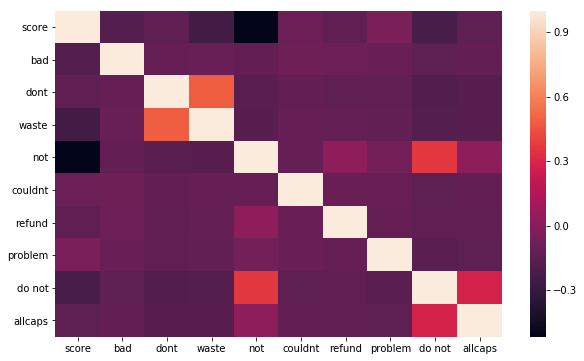

In [7]:
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(sms_rawc.corr())

Dont:waste, refund:not, allcaps:do not are correlated

In [8]:
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['score']

In [9]:
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of negative reviews out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of negative reviews out of a total 999 points : 406


In [10]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(target, y_pred)

0.5935935935935935

In [11]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[110, 389],
       [ 17, 483]], dtype=int64)

# Sensitivity

Percentage of positives correctly identified - 483/500 or 97%

# Specificity

Percentage of negatives correctly identified - 110/499 or 22%

In [12]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.61
Testing on Sample: 0.5935935935935935


In [13]:
#Cross validation

from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.6       , 0.59      , 0.61      , 0.61      , 0.59      ,
       0.54      , 0.62      , 0.57      , 0.61      , 0.56565657])